# 1. Exploratory Data Analysis

In [1]:
#Import Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Content Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TensorFlow
import tensorflow as tf
import tensorflow_recommenders as tfrs

In [2]:
# Read the data set

df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


From here we can join the 2 dataframes together, with the assumption that the cast or crew may work with other movie titles with the same genre, thus strengthening the recommender system.

# 2. Data Cleaning / Preparation

In [5]:
# Rename the id for joining

df_credits.rename(columns={'movie_id':'id'},inplace=True)

In [6]:
# Combine the 2 datasets

df_combine = pd.merge(df_movies,df_credits,on=['id','title'])

In [7]:
# Check for Null & Repeated Columns

df_combine.isna().sum().sort_values()

budget                     0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
revenue                    0
cast                       0
production_companies       0
production_countries       0
original_title             0
original_language          0
keywords                   0
id                         0
genres                     0
popularity                 0
crew                       0
release_date               1
runtime                    2
overview                   3
tagline                  844
homepage                3091
dtype: int64

In [8]:
# Drop Duplicated, Null Values, Redundant Columns

df_combine.drop(['homepage','original_language', 'release_date', 'status', 'tagline', 'title'],axis=1,inplace=True)
df_combine.head()

,budget,genres,id,keywords,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
# Use Regex to remove special characters

df_combine['genres'] = df_combine['genres'] \
                        .str.replace(r'[{}:""]', "") \
                        .str.replace("id ", "") \
                        .str.replace('name', "") \
                        .str.replace(r'\d', "") \
                        .str.replace(",  ","") \
                        .str.strip('[]') \
                        .str.replace(" ","")
                        

                                    
# Do the same for keywords for visual plotting
    
df_combine['keywords'] = df_combine['keywords'] \
                        .str.replace(r'[{}:""]', "") \
                        .str.replace("id ", "") \
                        .str.replace('name', "") \
                        .str.replace(r'\d', "") \
                        .str.replace(",  ","") \
                        .str.strip('[]') \
                        .str.replace(" ","")


C:\Users\ezlik\AppData\Local\Temp\ipykernel_15272\1924731263.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combine['genres'] = df_combine['genres'] \
C:\Users\ezlik\AppData\Local\Temp\ipykernel_15272\1924731263.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combine['keywords'] = df_combine['keywords'] \


In [10]:
df_combine['genres']

0       Action,Adventure,Fantasy,ScienceFiction
1                      Adventure,Fantasy,Action
2                        Action,Adventure,Crime
3                   Action,Crime,Drama,Thriller
4               Action,Adventure,ScienceFiction
                         ...                   
4798                      Action,Crime,Thriller
4799                             Comedy,Romance
4800               Comedy,Drama,Romance,TVMovie
4801                                           
4802                                Documentary
Name: genres, Length: 4803, dtype: object

In [11]:
df_combine['keywords']

0       cultureclash,future,spacewar,spacecolony,socie...
1       ocean,drugabuse,exoticisland,eastindiatradingc...
2       spy,basedonnovel,secretagent,sequel,mi,british...
3       dccomics,crimefighter,terrorist,secretidentity...
4       basedonnovel,mars,medallion,spacetravel,prince...
                              ...                        
4798    unitedstates\umexicobarrier,legs,arms,paperkni...
4799                                                     
4800    date,loveatfirstsight,narration,investigation,...
4801                                                     
4802                  obsession,camcorder,crush,dreamgirl
Name: keywords, Length: 4803, dtype: object

# 3. Exploratory Data Analysis

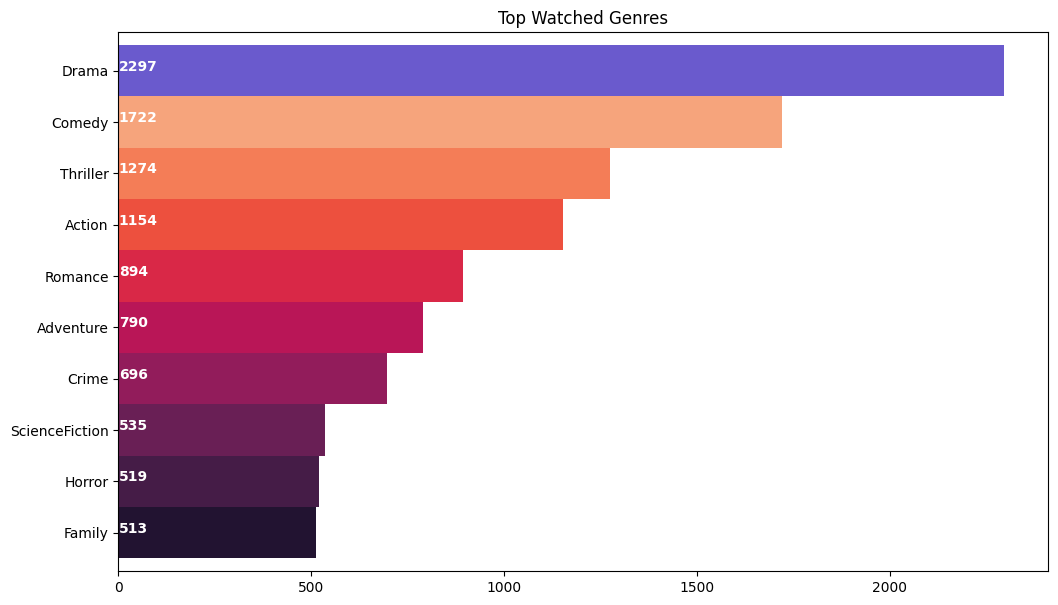

In [12]:
# Plot a bar chart for top genres

df_genres = df_combine.filter(['genres'], axis=1)
df_genres['genres'] = df_genres['genres'].str.split(',')


plt.subplots(figsize=(12,7))
genre_list=[]

for i in df_genres['genres']:
    genre_list.extend(i)
    
ax=pd.Series(genre_list).value_counts()[:10].sort_values(ascending=True).plot.barh(width=1.0,color=sns.color_palette('rocket',10))

for i, v in enumerate(pd.Series(genre_list).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white', weight = 'bold')
    
ax.patches[9].set_facecolor('slateblue')

plt.title('Top Watched Genres')
plt.show()

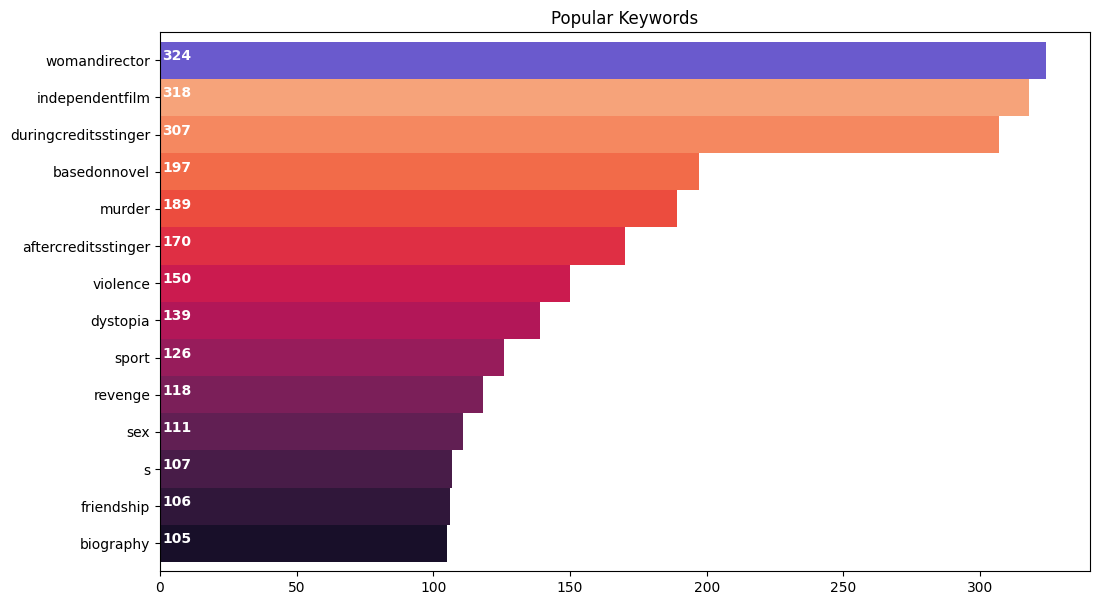

In [13]:
# Plot a bar chart for top keywords

df_keywords = df_combine.filter(['keywords'], axis=1)
df_keywords['keywords'] = df_keywords['keywords'].str.split(',')

plt.subplots(figsize=(12,7))
keywords_list=[]

for i in df_keywords['keywords']:
    keywords_list.extend(i)
    
ax=pd.Series(keywords_list).value_counts()[1:15].sort_values(ascending=True).plot.barh(width=1.0,color=sns.color_palette('rocket',15))

for i, v in enumerate(pd.Series(keywords_list).value_counts()[1:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
ax.patches[13].set_facecolor('slateblue')

plt.title('Popular Keywords')
plt.show()

# 4. Content Based Filtering (TFID vectorizer using "Overview")

In [14]:
# Replace NA with blank values

df_combine['overview'] = df_combine['overview'].fillna('')

In [15]:
# Extract Keywords

tfid = TfidfVectorizer(stop_words='english')
tfid_matrix = tfid.fit_transform(df_combine['overview'])

In [16]:
# Use Cosine Similarity to Calculate Similarity

sim = cosine_similarity(tfid_matrix,tfid_matrix)
sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

## 4.1 Test Build

In [17]:
# Create new index

df_index_genres = pd.Series(df_combine['genres'], name = 'genre')
df_index_title = pd.Series(df_combine['original_title'], name = 'original_title')
df_index = pd.merge(df_index_title, df_index_genres, right_index = True,
               left_index = True)

df_index = pd.Series(df_index.index, index=df_index['original_title']).drop_duplicates()

In [18]:
# 1. Input our target movie for recommendation
title = 'Avatar'

# 2. Align the target with the corresponding title
target = df_index[df_index.index==title].values[0]

In [19]:
X = list(enumerate(sim[target]))
sort_index = sorted(X,key=lambda x:x[1],reverse=True)
sort_index[1:10]

for i in sort_index[1:11]:
    recommend_movie= df_combine[df_combine.index == i[0]][['original_title', 'genres']].values
    print(recommend_movie)

[['Apollo 18' 'Horror,Thriller,ScienceFiction']]
[['The American' 'Crime,Drama,Thriller']]
[['The Matrix' 'Action,ScienceFiction']]
[['Obitaemyy Ostrov' 'Action,Fantasy,ScienceFiction,Thriller']]
[['Tears of the Sun' 'Action,Drama,War']]
[['Hanna' 'Action,Thriller,Adventure']]
[['The Adventures of Pluto Nash' 'Action,Comedy,ScienceFiction']]
[['Semi-Pro' 'Comedy']]
[['Supernova' 'Horror,ScienceFiction,Thriller']]
[['Blood and Chocolate' 'Drama,Fantasy,Horror,Romance']]


## 4.2 Define Into Function

In [20]:
def recommend_me_movies(title,n):
    
    output_list = []
    target = df_index[df_index.index==title].values[0]
    target_cos_list = list(enumerate(sim[target]))
    sort_list = sorted(target_cos_list,key=lambda x:x[1],reverse=True)
    for i in sort_list[1:n+1]:
        recommend_movie = df_combine[df_combine.index==i[0]][['original_title', 'genres']].values[0]
        output_list.append(recommend_movie)
    return np.array(output_list).tolist()

In [21]:
recommend_me_movies('Shrek 2',10)

[['Shrek the Third', 'Fantasy,Adventure,Animation,Comedy,Family'],
 ['Shrek Forever After', 'Comedy,Adventure,Fantasy,Animation,Family'],
 ['Shrek', 'Adventure,Animation,Comedy,Family,Fantasy'],
 ['The Story of Us', 'Comedy,Drama,Romance'],
 ['Puss in Boots', 'Action,Adventure,Animation,Family,Fantasy'],
 ['Everyone Says I Love You', 'Music,Comedy,Romance'],
 ['Riding in Cars with Boys', 'Comedy,Drama,Romance'],
 ['A Cinderella Story', 'Comedy'],
 ['House at the End of the Street', 'Horror,Thriller'],
 ['Ella Enchanted', 'Family,Fantasy,Comedy']]

## 4.3 Create an Input Menu to Test

In [22]:
# Create Input Menu

def action():
    loop = True
    while loop:
        print("=============Movie Recommender===========")
        print("1. Recommend Me Movies")
        print("2. Exit the Programe")
        print("================Version 1.0==============")
        choice = int(input("Choose Option "))

        if choice == 1:
            
            try:
                myvalue = input("Input a Movie Title For Me To Recommend based on: ")
                myvalue_title = myvalue.title()
                print("\n" "Your Recommended Movies are: ")
                
                for title in recommend_me_movies(myvalue_title,10):
                    print(title,"\n")
                
            
            except IndexError:
                print('Movie Not Found in Database, sorry!')
            
            
        elif choice == 2:
            print("Exiting programme, bye bye!")
            break
                     
        else:
            print("Wrong input, please try again")   

action()

=============Movie Recommender===========
1. Recommend Me Movies
2. Exit the Programe
================Version 1.0==============
Choose Option 1
Input a Movie Title For Me To Recommend based on: titanic

Your Recommended Movies are: 
['Raise the Titanic', 'Action,Drama,Thriller'] 

['Ghost Ship', 'Horror,Mystery,Thriller'] 

['I Can Do Bad All By Myself', 'Drama,Comedy'] 

['Event Horizon', 'Horror,ScienceFiction,Mystery'] 

['Niagara', 'Crime,Drama,Thriller'] 

['The Rose', 'Drama,Music,Romance'] 

['Triangle', 'Horror'] 

['The Ballad of Jack and Rose', 'Drama'] 

['Master and Commander: The Far Side of the World', 'Adventure'] 

['Poseidon', 'Adventure,Action,Drama,Thriller'] 

=============Movie Recommender===========
1. Recommend Me Movies
2. Exit the Programe
================Version 1.0==============
Choose Option 2
Exiting programme, bye bye!


Comments:

While using the TFID vectorizer on 'Overview' works to a certain degree, there were some recommendation errors observed. For example, when "Titanic" was keyed in, the recommended movies were for the most part acceptable, except 'Event Horizon', 'Triangle' & 'Ghost Ship' which are horror movies. 

While Titanic is largely a romance movie, other erroneous recommendations were also observed, such as "I Can Do Bad All By Myself", "Niagara" & "Poseidon".

In the next phase, I will use "genres" instead and do a comparison to determine the better attribute.

# 5. Content Based Filtering (TFID vectorizer using "Genres")

The same process will be used for this section, however I will use "Genres" instead of "Overview".

As the "genres" column has already been cleaned and processed earlier, no further processing is required.

## 5.1 Test Build

In [23]:
# Replace NA with blank values

df_combine['genres'] = df_combine['genres'].fillna('')

In [24]:
# Extract Keywords

tfid = TfidfVectorizer(stop_words='english')
tfid_matrix = tfid.fit_transform(df_combine['genres'])

In [25]:
# Use Cosine Similarity to Calculate Similarity

sim = cosine_similarity(tfid_matrix,tfid_matrix)
sim

array([[1.        , 0.8450897 , 0.48696815, ..., 0.        , 0.        ,
        0.        ],
       [0.8450897 , 1.        , 0.5762325 , ..., 0.        , 0.        ,
        0.        ],
       [0.48696815, 0.5762325 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [26]:
# 1. Input our target movie for recommendation
title = 'Avatar'

# 2. Align the target with the corresponding title
target = df_index[df_index.index==title].values[0]

In [27]:
X = list(enumerate(sim[target]))
sort_index = sorted(X,key=lambda x:x[1],reverse=True)
sort_index[1:10]

for i in sort_index[1:11]:
    recommend_movie= df_combine[df_combine.index == i[0]][['original_title', 'genres']].values
    print(recommend_movie)

[['Superman Returns' 'Adventure,Fantasy,Action,ScienceFiction']]
[['Man of Steel' 'Action,Adventure,Fantasy,ScienceFiction']]
[['X-Men: Days of Future Past' 'Action,Adventure,Fantasy,ScienceFiction']]
[['Jupiter Ascending' 'ScienceFiction,Fantasy,Action,Adventure']]
[['The Wolverine' 'Action,ScienceFiction,Adventure,Fantasy']]
[['Superman' 'Action,Adventure,Fantasy,ScienceFiction']]
[['Superman II' 'Action,Adventure,Fantasy,ScienceFiction']]
[['Beastmaster 2: Through the Portal of Time'
  'Action,Adventure,Fantasy,ScienceFiction']]
[['Teenage Mutant Ninja Turtles'
  'ScienceFiction,Action,Adventure,Fantasy,Comedy']]
[['Mystery Men' 'Adventure,Fantasy,Action,Comedy,ScienceFiction']]


## 5.2 Define Into Function

The same function will be reused.

In [28]:
def recommend_me_movies_ver_2(title,n):
    
    output_list = []
    target = df_index[df_index.index==title].values[0]
    target_cos_list = list(enumerate(sim[target]))
    sort_list = sorted(target_cos_list,key=lambda x:x[1],reverse=True)
    for i in sort_list[1:n+1]:
        recommend_movie = df_combine[df_combine.index==i[0]][['original_title', 'genres']].values[0]
        output_list.append(recommend_movie)
    return np.array(output_list).tolist()

In [29]:
recommend_me_movies_ver_2('Shrek 2',10)

[['Shrek the Third', 'Fantasy,Adventure,Animation,Comedy,Family'],
 ['The Croods', 'Adventure,Animation,Comedy,Family,Fantasy'],
 ['The Smurfs', 'Animation,Family,Adventure,Comedy,Fantasy'],
 ["The Emperor's New Groove", 'Adventure,Animation,Comedy,Family,Fantasy'],
 ['Shrek 2', 'Adventure,Animation,Comedy,Family,Fantasy'],
 ['The Lego Movie', 'Adventure,Animation,Comedy,Family,Fantasy'],
 ['Shrek', 'Adventure,Animation,Comedy,Family,Fantasy'],
 ['The Ant Bully', 'Fantasy,Adventure,Animation,Comedy,Family'],
 ['Un monstre à Paris', 'Adventure,Animation,Comedy,Family,Fantasy'],
 ['The Polar Express', 'Adventure,Animation,Family,Fantasy']]

## 5.3 Create Revised Input Menu to Test

In [30]:
# Create Input Menu

def action():
    loop = True
    while loop:
        print("=============Movie Recommender===========")
        print("1. Recommend Me Movies")
        print("2. Exit the Programe")
        print("================Version 2.0==============")
        choice = int(input("Choose Option "))

        if choice == 1:
            
            try:
                myvalue = input("Input a Movie Title For Me To Recommend based on: ")
                myvalue_title = myvalue.title()
                print("\n" "Your Recommended Movies are: ")
                
                for title in recommend_me_movies_ver_2(myvalue_title,10):
                    print(title,"\n")
                
            
            except IndexError:
                print('Movie Not Found in Database, sorry!')
            
            
        elif choice == 2:
            print("Exiting programme, bye bye!")
            break
                     
        else:
            print("Wrong input, please try again")   

action()

=============Movie Recommender===========
1. Recommend Me Movies
2. Exit the Programe
================Version 2.0==============
Choose Option 1
Input a Movie Title For Me To Recommend based on: titanic

Your Recommended Movies are: 
['The Phantom of the Opera', 'Thriller,Drama,Romance'] 

['Fifty Shades of Grey', 'Drama,Romance,Thriller'] 

['Angel Eyes', 'Drama,Romance,Thriller'] 

['Fatal Attraction', 'Drama,Romance,Thriller'] 

['Cruel Intentions', 'Drama,Romance,Thriller'] 

['O', 'Drama,Romance,Thriller'] 

['My Summer of Love', 'Drama,Thriller,Romance'] 

['Die Büchse der Pandora', 'Drama,Thriller,Romance'] 

['Escobar: Paradise Lost', 'Thriller,Romance'] 

['Fascination', 'Romance,Thriller'] 

=============Movie Recommender===========
1. Recommend Me Movies
2. Exit the Programe
================Version 2.0==============
Choose Option 2
Exiting programme, bye bye!


Comments:

Using genres, it is observed that the titles recommended are a much better match than before. For example, the titles recommended are all "Romance" and "Thriller", while a majority of the titles are of the "Drama" genre. 

In the next phase, I will attempt to use tensorflow on this dataset.